In [1]:
# import libraries
import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import functools as ft
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re



KeyError: 'All_vegan'

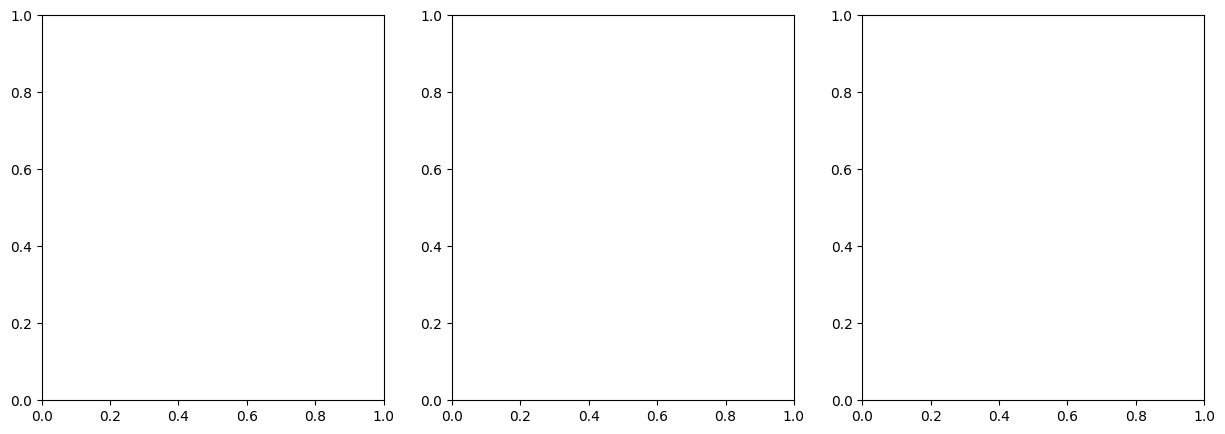

In [3]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

cruelty_free_ulta_df = pd.read_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/ulta.csv')

# Cruelty-Free Ulta Pie Chart
all_vegan_count_ulta = cruelty_free_ulta_df['All_vegan'].sum()
partial_vegan_count_ulta = cruelty_free_ulta_df['Partial_vegan'].sum()
bad_parent_count_ulta = cruelty_free_ulta_df['Bad_parent_company'].sum()
counts_ulta = [all_vegan_count_ulta, partial_vegan_count_ulta, bad_parent_count_ulta, cruelty_free_count]
colors = ['#5cb85c', '#f0ad4e', '#d9534f', '#5bc0de']
axes[0].pie(counts_ulta, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Number of Brands by Category - Ulta')

# Cruelty-Free BeautyBay Pie Chart
all_vegan_count_beautybay = cruelty_free_beautybay_df['All_vegan'].sum()
partial_vegan_count_beautybay = cruelty_free_beautybay_df['Partial_vegan'].sum()
bad_parent_count_beautybay = cruelty_free_beautybay_df['Bad_parent_company'].sum()
counts_beautybay = [all_vegan_count_beautybay, partial_vegan_count_beautybay, bad_parent_count_beautybay, cruelty_free_count]
axes[1].pie(counts_beautybay, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Number of Brands by Category - BeautyBay')

# Cruelty-Free CultBeauty Pie Chart
all_vegan_count_cultbeauty = cruelty_free_cultbeauty_df['All_vegan'].sum()
partial_vegan_count_cultbeauty = cruelty_free_cultbeauty_df['Partial_vegan'].sum()
bad_parent_count_cultbeauty = cruelty_free_cultbeauty_df['Bad_parent_company'].sum()
counts_cultbeauty = [all_vegan_count_cultbeauty, partial_vegan_count_cultbeauty, bad_parent_count_cultbeauty, cruelty_free_count]
axes[2].pie(counts_cultbeauty, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Number of Brands by Category - CultBeauty')

# Adjust spacing between subplots
plt.tight_layout()

# Display the combined graph
plt.show()


In [ ]:
r = requests.get("https://logicalharmony.net/cruelty-free-brands-at-ulta/")
soup = BeautifulSoup(r.text, 'html.parser')

# create an empty list that will store brands
brands = []

# create another list that will contain each list item still with the tags
rows = []

# get all list tags in entry-content part of the page (found by inspecting site)
brand_section1 = soup.find(class_='entry-content')
for brand in brand_section1.find_all('li'):
    # make sure brands are being extracted correctly
    # print(brand.text)
    # append each brand to the list of brands
    brands.append(brand.text)
    # keep the tags info in this list
    rows.append(brand)
    
len(brands)

In [ ]:
# create dataframe - start with just brands list, then adjust
cruelty_free_ulta_df = pd.DataFrame({'Brand_info': brands})   
cruelty_free_ulta_df.to_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/cruelty_free_ulta.csv', index=False)
cruelty_free_ulta_df.head()

In [ ]:
# create a new column that tells whether or not a product is vegan
# create dataframe - start with just brands list, then adjust
cruelty_free_ulta_df['All_vegan'] = cruelty_free_ulta_df['Brand_info'].str.contains('100% vegan')
cruelty_free_ulta_df['Partial_vegan'] = cruelty_free_ulta_df['Brand_info'].str.contains('vegan product', case=False)

In [ ]:
print(cruelty_free_ulta_df.All_vegan.sum())
print(cruelty_free_ulta_df.Partial_vegan.sum())
cruelty_free_ulta_df.head()

In [ ]:
cruelty_free_ulta_df['Brand_info'].str.contains('Parent company').sum()


In [ ]:
cruelty_free_ulta_df.to_csv('C:/Users/shaan/Desktop/big_data/bsc-big-data/Project/DataSets/cruelty_free_ulta.csv', index=False)

In [ ]:
# count the number of brands in each category
all_vegan_count = cruelty_free_ulta_df['All_vegan'].sum()
partial_vegan_count = cruelty_free_ulta_df['Partial_vegan'].sum()
bad_parent_count = cruelty_free_ulta_df['Bad_parent_company'].sum()

# create a bar plot of the counts
labels = ['All Vegan', 'Partially Vegan', 'Bad Parent Company']
counts = [all_vegan_count, partial_vegan_count, bad_parent_count]
plt.bar(labels, counts)
plt.title('Number of Brands by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
# count the number of brands in each category
all_vegan_count = cruelty_free_ulta_df['All_vegan'].sum()
partial_vegan_count = cruelty_free_ulta_df['Partial_vegan'].sum()
bad_parent_count = cruelty_free_ulta_df['Bad_parent_company'].sum()
cruelty_free_count = len(cruelty_free_only)

# create a pie chart of the counts
labels = ['All Vegan', 'Partially Vegan', 'Bad Parent Company', 'Cruelty-Free Only']
counts = [all_vegan_count, partial_vegan_count, bad_parent_count, cruelty_free_count]
colors = ['#5cb85c', '#f0ad4e', '#d9534f', '#5bc0de']
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Number of Brands by Category')
plt.show()
